<a href="https://colab.research.google.com/github/revanthmadasu/machine-learning/blob/master/simulation/traffic_flow_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

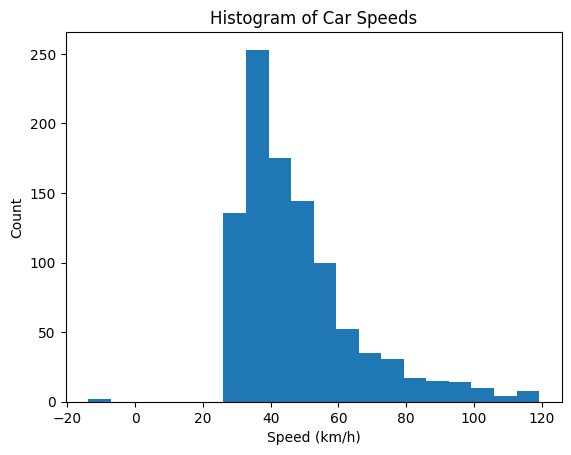

In [7]:
import random

# Define the number of lanes and cars in the simulation
num_lanes = 3
num_cars = 1000

# Define the maximum and minimum speeds of the cars in km/h
max_speed = 120
min_speed = 30

# Define the length of the road segment in km
road_length = 10

# Define the time step for the simulation in seconds
time_step = 1

# Define the maximum number of time steps for the simulation
max_time_steps = 3600

# Initialize the positions and speeds of the cars randomly
positions = [random.uniform(0, road_length) for i in range(num_cars)]
speeds = [random.uniform(min_speed, max_speed) for i in range(num_cars)]

for i in range(len(speeds)):
  if speeds[i] <= 0:
    positions.pop(i)
    speeds.pop(i)
    num_cars -= 1

# Simulate the traffic flow for the specified number of time steps
for t in range(max_time_steps):
    # Calculate the distances between adjacent cars
    distances = [positions[i+1] - positions[i] for i in range(num_cars-1)]
    distances.append(road_length - positions[-1] + positions[0])
    
    # Calculate the time it would take for each car to reach the next car at its current speed
    times_to_collision = [distances[i]/speeds[i] for i in range(num_cars)]
    
    # Determine the minimum time to collision and the index of the cars involved
    min_time_to_collision = min(times_to_collision)
    min_time_to_collision_index = times_to_collision.index(min_time_to_collision)
    next_car_index = min_time_to_collision_index + 1 if min_time_to_collision_index < num_cars-1 else 0
    
    # Calculate the new positions of the cars
    positions = [positions[i] + speeds[i]*min_time_to_collision for i in range(num_cars)]
    
    # Calculate the new speed of the car that reached the next car first
    new_speed = distances[min_time_to_collision_index] / (times_to_collision[min_time_to_collision_index] + time_step)
    
    # Update the speeds of the cars
    speeds[min_time_to_collision_index] = new_speed
    speeds[next_car_index] = new_speed

# Plot a histogram of the speeds of the cars at the end of the simulation
import matplotlib.pyplot as plt

plt.hist(speeds, bins=20)
plt.xlabel('Speed (km/h)')
plt.ylabel('Count')
plt.title('Histogram of Car Speeds')
plt.show()
